# Library

In [1]:
import cv2
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from skimage import exposure, feature
from imutils import paths
import matplotlib.pyplot as plt
import argparse
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, log_loss
import seaborn as sns
import pandas as pd
import random
import shutil

# Local Binary Pattern (Numpoints=24, radius 4)

In [2]:
# Local Binnary Patterns (LBP) class
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):
        lbp = feature.local_binary_pattern(image, self.numPoints,
                                           self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                  bins=np.arange(0, self.numPoints + 3),
                                  range=(0, self.numPoints + 2))

        # Normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)

        return hist

In [3]:
# Initialize the local binary patterns descriptor along with
desc = LocalBinaryPatterns(24, 4)

In [4]:
# Specify the paths to the training and testing images
training_path = "Dataset/Train"
testing_path = "Dataset/Test"

In [5]:
# Initialize the data and label lists
data = []
labels = []

# Loop over the training images
for imagePath in paths.list_images(training_path):
    # Load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)

    # Extract the label from the image path, then update the
    # label and data lists
    labels.append(imagePath.split(os.path.sep)[-2])
    data.append(hist)

In [6]:
# Check the length of the data and labels
print('Length of the data:', len(data))
print('Length of the labels:', len(labels))

# Check the label names
print('Label names:', np.unique(labels))

# Check the shape of the data
print('Shape of the data:', np.shape(data))

# Check the data each label
print('Number of positive images:', labels.count('Positive'))
print('Number of negative images:', labels.count('Negative'))

Length of the data: 32000
Length of the labels: 32000
Label names: ['Negative' 'Positive']
Shape of the data: (32000, 26)
Number of positive images: 16000
Number of negative images: 16000


# Training Model Random Forest Gini Criterion

In [7]:
# Train a Random Forest Gini Criterion
model_RFG = RandomForestClassifier(criterion='gini',random_state=42)
model_RFG.fit(data,labels)

RandomForestClassifier(random_state=42)

# Training Model Random Forest Entropy Criterion

In [8]:
# Train a Random Forest Information Gain Criterion
model_RFE = RandomForestClassifier(criterion='entropy',random_state=42)
model_RFE.fit(data,labels)

RandomForestClassifier(criterion='entropy', random_state=42)

# Training Model Random Forest Log Loss Criterion

In [9]:
# Train a Random Forest Information Gain Criterion
model_RFL = RandomForestClassifier(criterion='log_loss',random_state=42)
model_RFL.fit(data,labels)

RandomForestClassifier(criterion='log_loss', random_state=42)

# Confussion Matrix & Classification Report Random Forest Gini

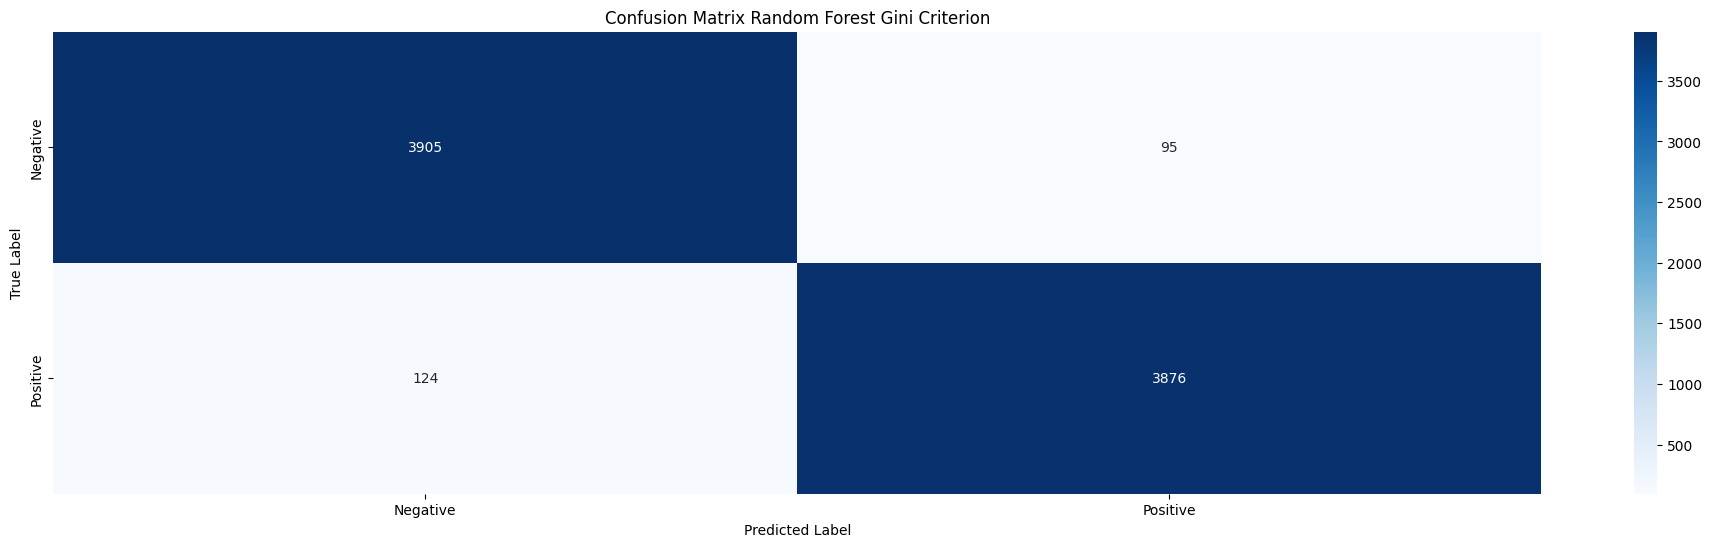

In [10]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_RFG.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(24, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Random Forest Gini Criterion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_RFG_n24r4 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_RFG_n24r4)

# Get the F1 score
f1_score_RFG_n24r4 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_RFG_n24r4)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.9692    0.9762    0.9727      4000
    Positive     0.9761    0.9690    0.9725      4000

    accuracy                         0.9726      8000
   macro avg     0.9726    0.9726    0.9726      8000
weighted avg     0.9726    0.9726    0.9726      8000

Accuracy Score: 0.972625
F1 Score: 0.9726246402706635


# Confussion Matrix & Classification Report Random Forest Entropy

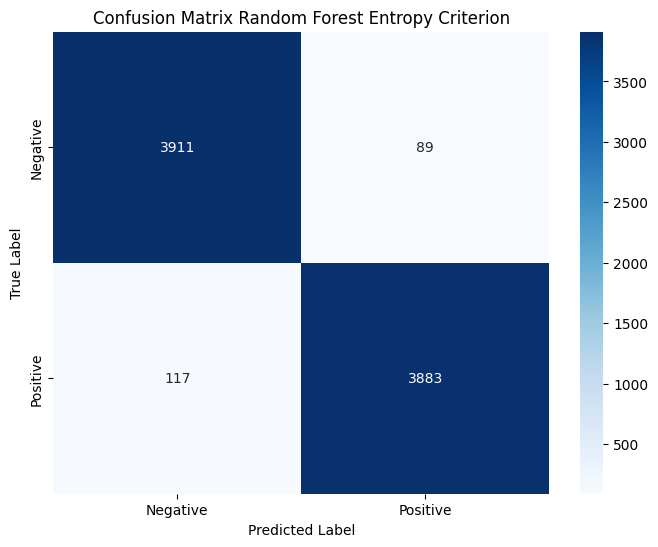

In [12]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_RFE.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Random Forest Entropy Criterion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_RFE_n24r4 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_RFE_n24r4)

# Get the F1 score
f1_score_RFE_n24r4 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_RFE_n24r4)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.9710    0.9778    0.9743      4000
    Positive     0.9776    0.9708    0.9742      4000

    accuracy                         0.9742      8000
   macro avg     0.9743    0.9743    0.9742      8000
weighted avg     0.9743    0.9742    0.9742      8000

Accuracy Score: 0.97425
F1 Score: 0.9742496845586358


# Confussion Matrix & Classification Report Random Forest Log Loss


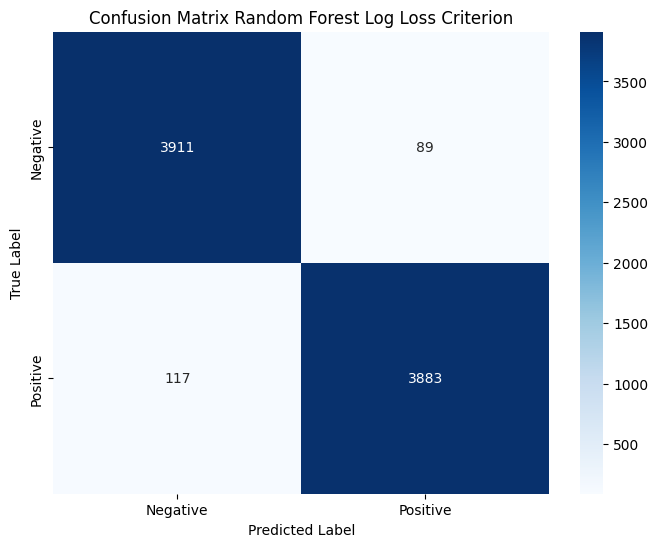

In [14]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_RFL.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Random Forest Log Loss Criterion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_RFL_n24r4 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_RFL_n24r4)

# Get the F1 score
f1_score_RFL_n24r4 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_RFL_n24r4)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.9710    0.9778    0.9743      4000
    Positive     0.9776    0.9708    0.9742      4000

    accuracy                         0.9742      8000
   macro avg     0.9743    0.9743    0.9742      8000
weighted avg     0.9743    0.9742    0.9742      8000

Accuracy Score: 0.97425
F1 Score: 0.9742496845586358


# Wrap Up

In [16]:
# wrap the models in a list
# make dict of models to loop through
model = {
    "Random Forest Gini NumPoint = 24 Radius = 4": model_RFG,
    "Random Forest Entropy NumPoint = 24 Radius = 4": model_RFE,
    "Random Forest Log Loss NumPoint = 24 Radius = 4": model_RFL
}

# Make dict of accuracy scores to loop through
acc_score = {
    "Random Forest Gini NumPoint = 24 Radius = 4": acc_score_RFG_n24r4,
    "Random Forest Entropy NumPoint = 24 Radius = 4": acc_score_RFE_n24r4,
    "Random Forest Log Loss NumPoint = 24 Radius = 4": acc_score_RFL_n24r4
}

# Make dict of F1 scores to loop through
f1_score = {
    "Random Forest Gini NumPoint = 24 Radius = 4": f1_score_RFG_n24r4,
    "Random Forest Entropy NumPoint = 24 Radius = 4": f1_score_RFE_n24r4,
    "Random Forest Log Loss NumPoint = 24 Radius = 4": f1_score_RFL_n24r4
}

# Make DataFrame of all the scores
df = pd.DataFrame(list(acc_score.items()), columns=['Model', 'Accuracy Score'])
df['F1 Score'] = f1_score.values()

# Sort the values by f1 score
df.sort_values(by=['F1 Score'], inplace=True, ascending=False)

# Display the DataFrame
print(df)

                                             Model  Accuracy Score  F1 Score
1   Random Forest Entropy NumPoint = 24 Radius = 4        0.974250  0.974250
2  Random Forest Log Loss NumPoint = 24 Radius = 4        0.974250  0.974250
0      Random Forest Gini NumPoint = 24 Radius = 4        0.972625  0.972625


In [17]:
# Save all the model
import pickle
# model as a pickle file
model_RFG_pkl_file = "RFG_n24r4.pkl"
model_RFE_pkl_file = "RFE_n24r4.pkl"
model_RFL_pkl_file = "RFL_n24r4.pkl"

with open(model_RFG_pkl_file, 'wb') as file:  
    pickle.dump(model_RFG, file)

with open(model_RFE_pkl_file, 'wb') as file:
    pickle.dump(model_RFE, file)

with open(model_RFL_pkl_file, 'wb') as file:
    pickle.dump(model_RFL, file)